# 可视化训练日志

## 导入工具包

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
fater_path = os.path.abspath('..')
print(fater_path)
os.chdir(fater_path)

/home/mark/Documents/PythonProject/ShuffleNet-Retrain/ShuffleNetV2+


## 设置Matplotlib中文字体

In [5]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [6]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [7]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /home/mark/anaconda3/envs/SemanticTest/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/mark/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体
matplotlib.matplotlib_fname()

--2023-12-15 15:59:19--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 127.0.0.1:7890... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: ‘/home/mark/anaconda3/envs/SemanticTest/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/home/mark/anaconda 100%[===================>]   9.58M  7.00MB/s    用时 1.4s    

2023-12-15 15:59:21 (7.00 MB/s) - 已保存 ‘/home/mark/anaconda3/envs/SemanticTest/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ [10050868/10050868])



'/home/mark/anaconda3/envs/SemanticTest/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

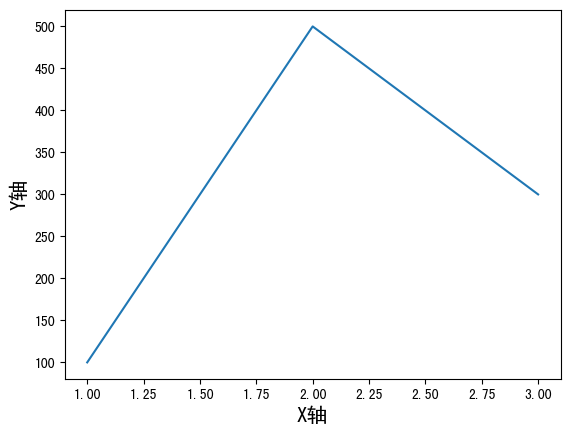

In [8]:
plt.plot([1,2,3], [100,500,300])
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 载入训练日志表格

In [9]:
models_path = './models/2023-12-14-17:59_max_epoch_100-afterSOD/log/'
df_train = pd.read_csv(models_path + '训练日志-训练集.csv')
df_easy_test = pd.read_csv(models_path + '训练日志-easy-测试集.csv')
df_hard_test = pd.read_csv(models_path + '训练日志-hard-测试集.csv')

In [10]:
df_train

,epoch,iter,batch,lr,loss_tensor,train_loss_numpy,train_accuracy_top1,prec1,prec2,prec3
0,1,1/80200,1,5.000000e-05,2.041783,2.041783,0.2,0.2,0.5,0.6
1,1,2/80200,2,5.000000e-05,2.347057,2.347057,0.0,0.0,0.2,0.4
2,1,3/80200,3,5.000000e-05,2.494325,2.494325,0.1,0.1,0.2,0.2
3,1,4/80200,4,5.000000e-05,2.117780,2.117780,0.3,0.3,0.3,0.5
4,1,5/80200,5,5.000000e-05,2.005171,2.005171,0.2,0.2,0.3,0.5
...,...,...,...,...,...,...,...,...,...,...
80195,100,80196/80200,80196,9.765625e-08,1.690995,1.690994,0.4,0.4,0.7,0.7
80196,100,80197/80200,80197,9.765625e-08,1.134902,1.134902,0.8,0.8,1.0,1.0
80197,100,80198/80200,80198,9.765625e-08,1.708799,1.708799,0.3,0.3,0.5,0.8
80198,100,80199/80200,80199,9.765625e-08,1.649763,1.649763,0.6,0.6,0.7,0.7


In [11]:
df_easy_test

,epoch,test_easy_loss,test_easy_accuracy,test_easy_precision,test_easy_recall,test_easy_f1-score
0,1.0,1.517816,0.489565,0.381032,0.311029,0.276652
1,2.0,1.441588,0.492826,0.381231,0.324554,0.291300
2,3.0,1.450074,0.507391,0.393404,0.318623,0.282466
3,4.0,1.362386,0.517609,0.383310,0.336943,0.319867
4,5.0,1.365398,0.516739,0.382823,0.337078,0.313457
...,...,...,...,...,...,...
95,96.0,1.229725,0.556522,0.576446,0.404290,0.393870
96,97.0,1.230439,0.556304,0.450837,0.404709,0.393502
97,98.0,1.230827,0.557826,0.457741,0.405128,0.394487
98,99.0,1.230446,0.556522,0.455130,0.404263,0.393564


In [12]:
df_hard_test

,epoch,test_hard_loss,test_hard_accuracy,test_hard_precision,test_hard_recall,test_hard_f1-score
0,1.0,1.611699,0.428000,0.381754,0.293250,0.250650
1,2.0,1.524096,0.455667,0.374117,0.324429,0.281698
2,3.0,1.539764,0.459667,0.425997,0.318914,0.273617
3,4.0,1.464126,0.481667,0.401053,0.344265,0.322024
4,5.0,1.458191,0.484000,0.405145,0.342048,0.311868
...,...,...,...,...,...,...
95,96.0,1.353215,0.528000,0.456413,0.407858,0.391033
96,97.0,1.353269,0.530000,0.461139,0.409375,0.392400
97,98.0,1.354208,0.527333,0.461950,0.406903,0.389892
98,99.0,1.353460,0.527667,0.455991,0.406901,0.390214


## 训练集损失函数

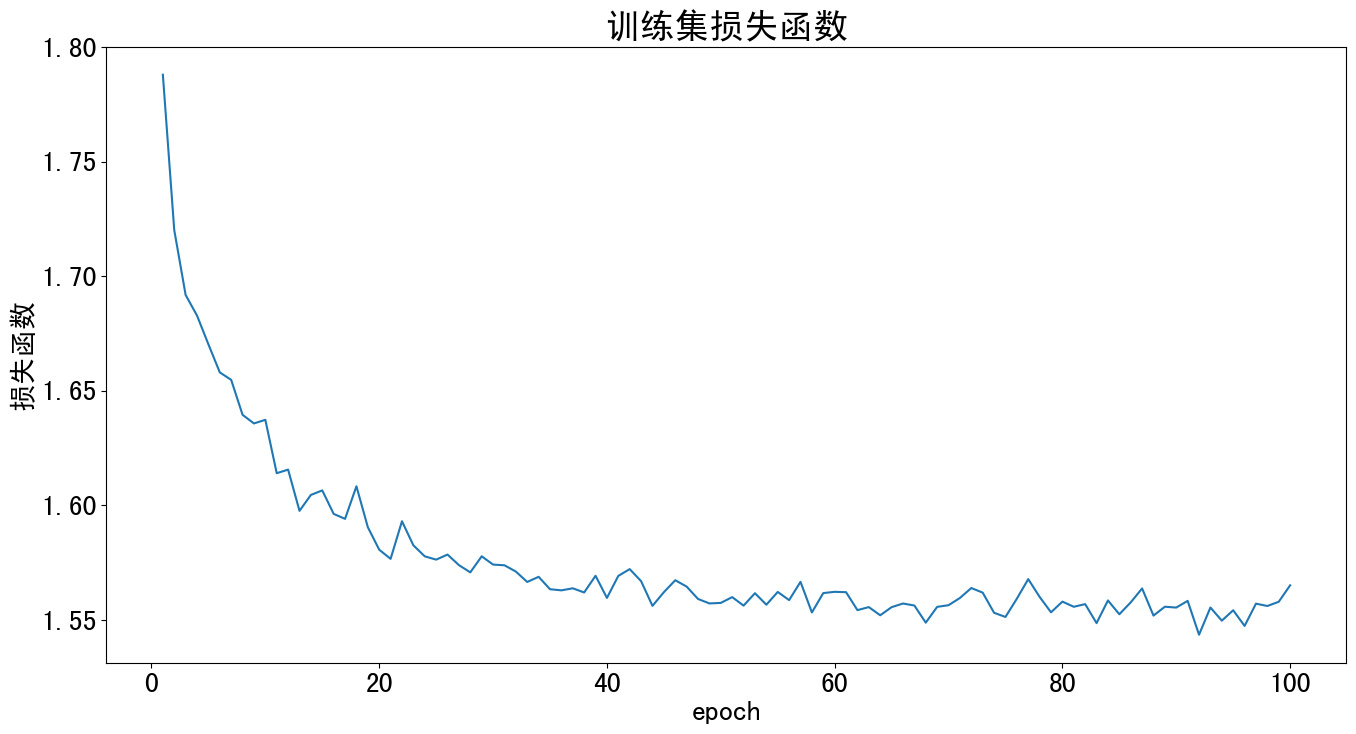

In [13]:
plt.figure(figsize=(16, 8))
grouped = df_train.groupby('epoch').agg({'train_loss_numpy': 'mean', 'epoch': 'mean'})
x = grouped['epoch']

y = grouped['train_loss_numpy']

plt.plot(x, y, label='训练集')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('损失函数', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig(models_path + '训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 训练集准确率

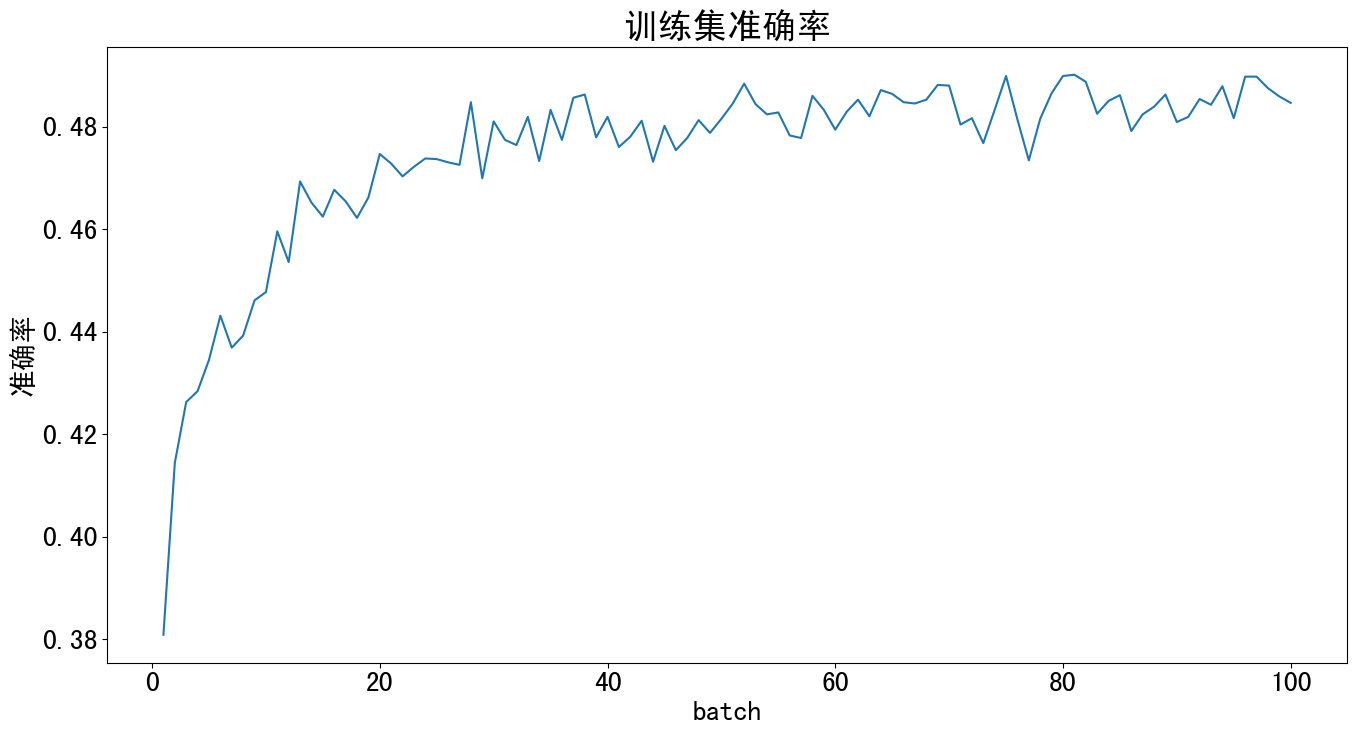

In [14]:
plt.figure(figsize=(16, 8))
grouped = df_train.groupby('epoch').agg({'train_accuracy_top1': 'mean', 'epoch': 'mean'})
x = grouped['epoch']
y = grouped['train_accuracy_top1']

plt.plot(x, y, label='训练集')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('准确率', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig(models_path +'训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集损失函数

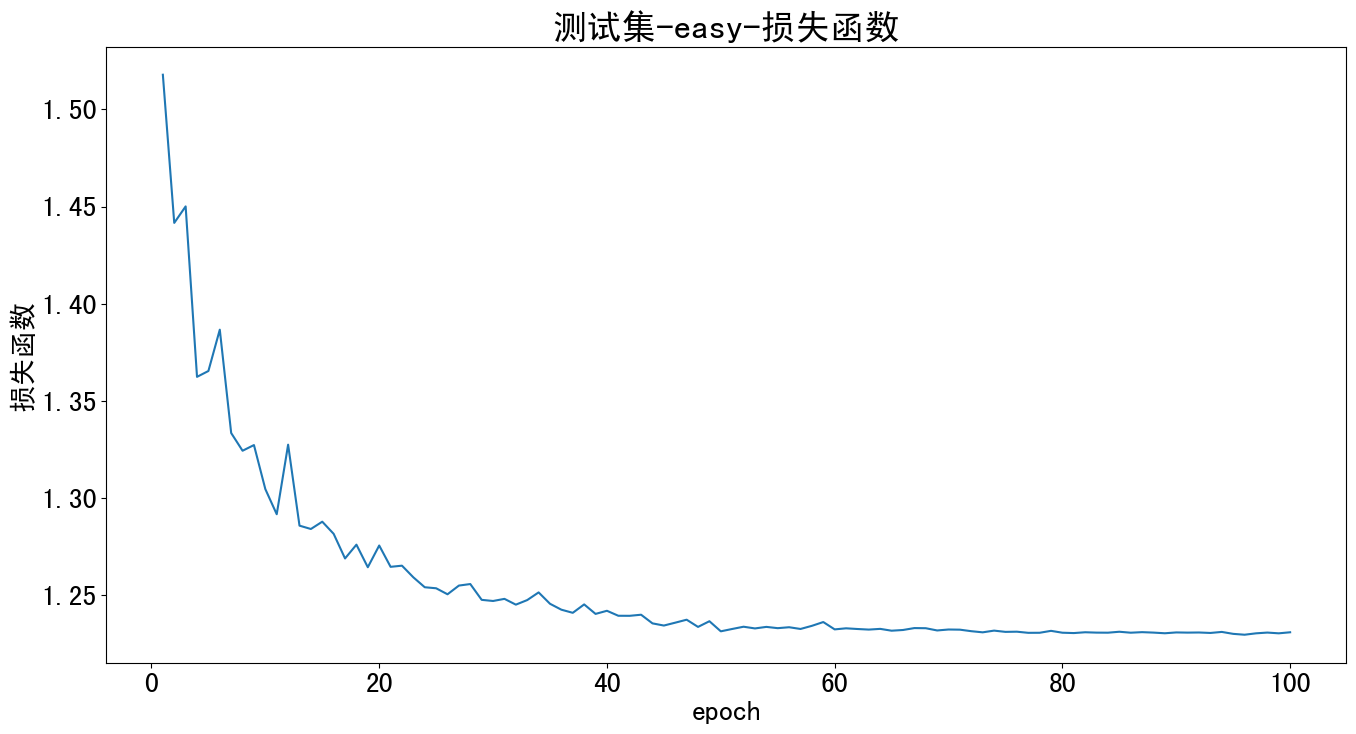

In [15]:
plt.figure(figsize=(16, 8))

x = df_easy_test['epoch']
y = df_easy_test['test_easy_loss']

plt.plot(x, y, label='测试集')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('损失函数', fontsize=20)
plt.title('测试集-easy-损失函数', fontsize=25)
plt.savefig(models_path + '测试集-easy-损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

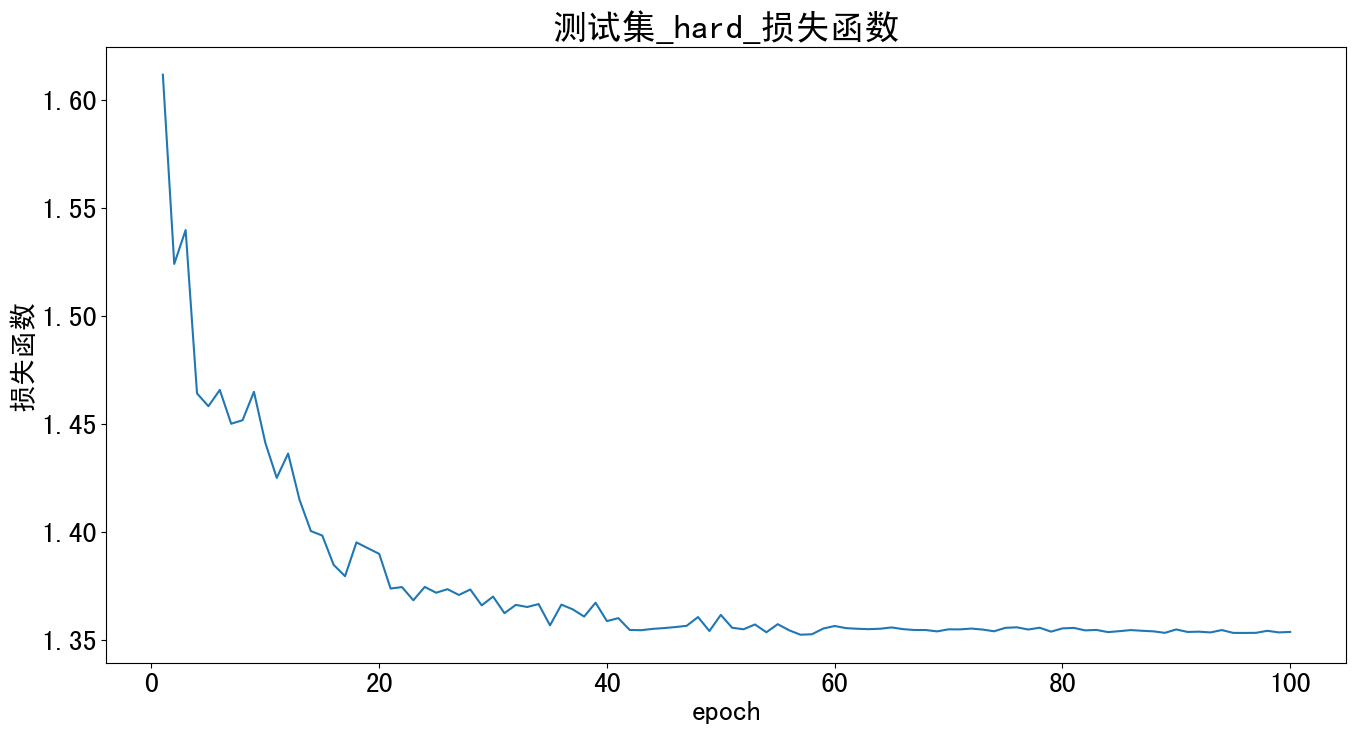

In [16]:
plt.figure(figsize=(16, 8))

x = df_hard_test['epoch']
y = df_hard_test['test_hard_loss']

plt.plot(x, y, label='测试集')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('损失函数', fontsize=20)
plt.title('测试集_hard_损失函数', fontsize=25)
plt.savefig(models_path + '测试集-hard-损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [17]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg


In [18]:
metrics = ['test_easy_accuracy', 'test_easy_precision', 'test_easy_recall', 'test_easy_f1-score']

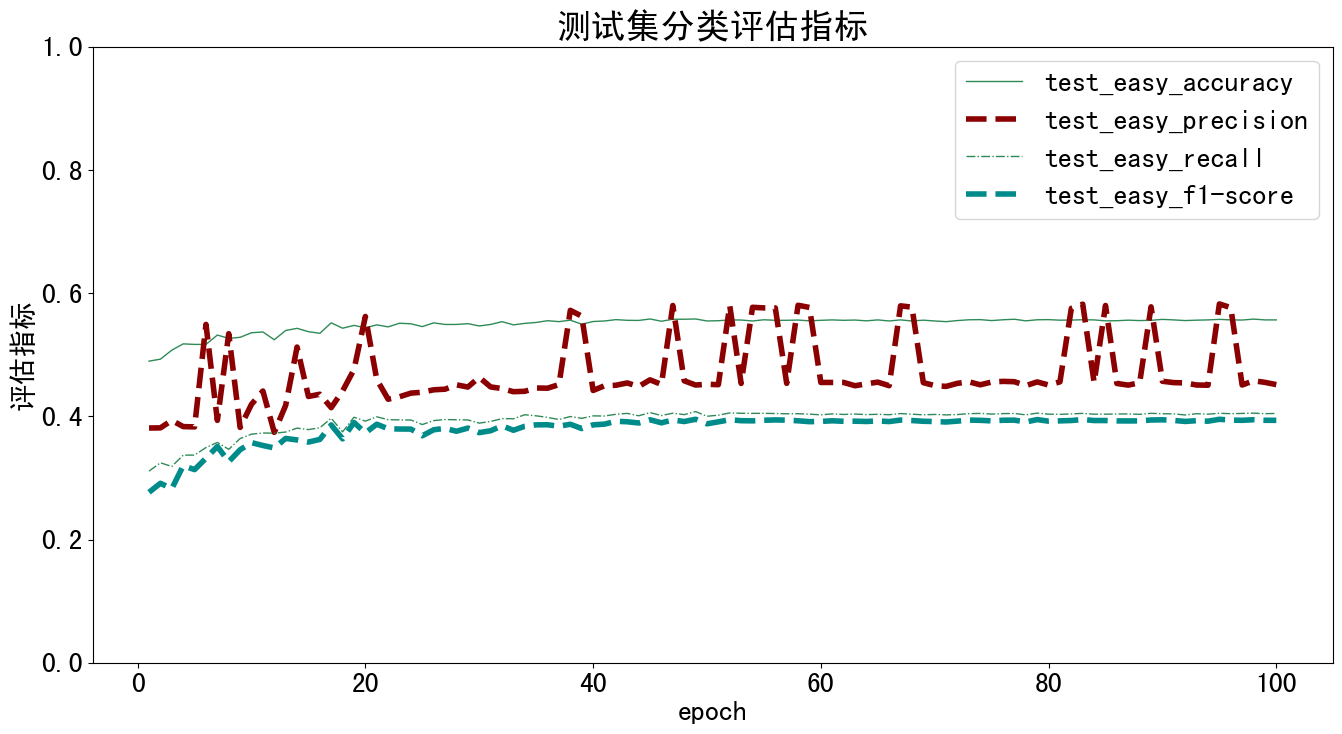

In [19]:
plt.figure(figsize=(16, 8))

x = df_easy_test['epoch']
for y in metrics:
    plt.plot(x, df_easy_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 1])
plt.xlabel('epoch', fontsize=20)
plt.ylabel('评估指标', fontsize=20)
plt.title('测试集分类评估指标', fontsize=25)
plt.savefig(models_path + '测试集-easy-分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()